# Reconstruct point location over time


+ 27.44S 58W S america

In [1]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [6]:
rotation_filename = '../1-data/PALEOMAP_PlateModel.rot'

In [7]:
# Required parameters for a motion path feature
SeedPoint = (-27.44, -58)
MovingPlate = 201
RelativePlate = 1
TimeStep = 5
times = np.arange(0,101,float(TimeStep))

# Create the motion path feature
digitisation_time = 0
seed_points_at_digitisation_time = pygplates.MultiPointOnSphere([SeedPoint])
motion_path_feature = pygplates.Feature.create_motion_path(
        seed_points_at_digitisation_time,
        times,
        valid_time=(200., 0.),
        relative_plate=RelativePlate,
        reconstruction_plate_id = MovingPlate)

In [8]:
rotation_model = pygplates.RotationModel(rotation_filename)

# Create the shape of the motion path
reconstruction_time = 0
reconstructed_motion_paths = []
pygplates.reconstruct(
        motion_path_feature, rotation_model, reconstructed_motion_paths, reconstruction_time,
        reconstruct_type=pygplates.ReconstructType.motion_path)

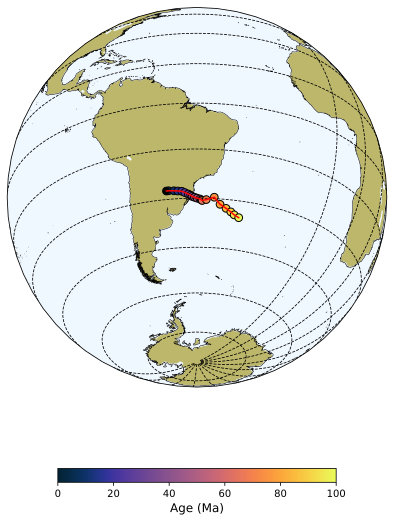

In [9]:
# get the reconstructed plate geometry coordinates into numpy arrays
for reconstructed_motion_path in reconstructed_motion_paths:
    trail = reconstructed_motion_path.get_motion_path().to_lat_lon_array()

## Plotting - note that we use the median of the motion path coordinates as the map center
fig = plt.figure(figsize=(10,10), dpi=500)

ax_map = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=np.median(trail[:,1]), 
                                                           central_latitude=np.median(trail[:,0])))

ax_map.coastlines(resolution='10m', color='black', linewidth=0.5)
ax_map.add_feature(cfeature.LAND, color = 'darkkhaki', edgecolor='black')
ax_map.add_feature(cfeature.OCEAN, color='aliceblue')
ax_map.add_feature(cfeature.LAKES, color='aliceblue', edgecolor='black')

# Gives meridians and parallels
ax_map.gridlines(color='black',linestyle='--', xlocs=np.arange(0,360,15), ylocs=np.arange(-90,90,15))


#Plot the movement of point on the plate.
x, y = np.flipud(trail[:,1]), np.flipud(trail[:,0])
ax_map.plot(x[0],y[0],'ko', transform=ccrs.PlateCarree())
ax_map.plot(x,y,'r', transform=ccrs.PlateCarree())

l1=ax_map.scatter(x, y, 60, c=times, marker='o',
                  cmap=cmo.cm.thermal, edgecolor='k', transform=ccrs.PlateCarree())
# ax_map.set_title('Motion Path of point on plate %d relative to %d' % (MovingPlate,RelativePlate))


# Set a colourbar to visualise the passage of time (Ma)
fig.colorbar(l1, ax=ax_map, shrink=0.5, orientation='horizontal').set_label('Age (Ma)',fontsize=12)

# Show global projection and plot
ax_map.set_global()
# plt.savefig('motionpath.png', bbox_inches='tight', dpi=500)
plt.show()